In [1]:
#Imports
import pandas as pd
from datetime import datetime, timedelta
import hvplot.pandas
import numpy as np
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
#from pypfopt.expected_returns import mean_historical_return
from pypfopt import plotting
from pypfopt.risk_models import risk_matrix
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import scipy.optimize as sco
from pypfopt import risk_models
#from pypfopt.efficient_frontier import EfficientFrontier
#ef = EfficientFrontier(mu, S)
#weights = ef.max_sharpe()

(CVXPY) Aug 21 06:59:54 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError("dlopen(/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib\n  Referenced from: <825F20AD-4E2F-31FC-9288-650E1DDAA389> /Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so\n  Reason: tried: '/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/../../../liblapack.3.dylib' (no such file), '/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/../../../liblapack.3.dylib' (no such file), '/Users/bpalmy/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/Users/bpalmy/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/usr/local/lib/liblapack.3.dylib' (no such file), '/usr/lib/liblapack.3.dylib' (no such file, not in dyld cache)")
(CVXPY) Aug 21 06:59:54 PM: Encountered unexpected exception impor

In [2]:
stock_symbols = [ "AAPL", "MSFT", "GOOG", "META", "AMZN"] # Change this to the desired stock symbol
# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days
portfolio_data= yf.download(stock_symbols, start=start_date, end=end_date)
#Drop Nulls. Remove high, low, open data. 
print(portfolio_data.isnull().sum())
portfolio_data = portfolio_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
portfolio_data.dropna()

[*********************100%%**********************]  5 of 5 completed
Adj Close  AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
Close      AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
High       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
Low        AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
Open       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
Volume     AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
dtype: int64


Adj Close                                                
                  AAPL        AMZN        GOOG        META        MSFT
Date                                                                  
2013-08-23   15.616634   14.500500   21.674009   40.549999   29.100163
2013-08-26   15.677417   14.310500   21.578867   41.340000   28.597725
2013-08-27   15.229194   14.046500   21.174383   39.639999   27.852404
2013-08-28   15.301196   14.079000   21.134533   40.549999   27.651434
2013-08-29   15.326132   14.199000   21.305889   41.279999   28.095263
...                ...         ...         ...         ...         ...
2023-08-14  179.460007  140.570007  131.830002  306.190002  323.355408
2023-08-15  177.449997  137.669998  130.270004  301.950012  321.179962
2023-08-16  176.570007  135.070007  129.110001  294.290009  320.399994
2023-08-17  174.000000  133.979996  130.460007  285.089996  316.880005
2023-08-18  174.490005  133.220001  128.110001  283.250000  316.480011

[2514 rows x 5 columns]

In [4]:
stock_symbols = [ "AAPL", "MSFT", "GOOG", "META", "AMZN"] # Change this to the desired stock symbol
# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days
portfolio_data= yf.download(stock_symbols, start=start_date, end=end_date)
#Drop Nulls. Remove high, low, open data. 
print(portfolio_data.isnull().sum())
portfolio_data = portfolio_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
portfolio_data.dropna()

[*********************100%%**********************]  5 of 5 completed
Adj Close  AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
Close      AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
High       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
Low        AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
Open       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
Volume     AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
dtype: int64


Adj Close                                                
                  AAPL        AMZN        GOOG        META        MSFT
Date                                                                  
2013-08-23   15.616633   14.500500   21.674009   40.549999   29.100163
2013-08-26   15.677416   14.310500   21.578867   41.340000   28.597725
2013-08-27   15.229183   14.046500   21.174383   39.639999   27.852404
2013-08-28   15.301196   14.079000   21.134533   40.549999   27.651434
2013-08-29   15.326131   14.199000   21.305889   41.279999   28.095263
...                ...         ...         ...         ...         ...
2023-08-14  179.460007  140.570007  131.830002  306.190002  323.355408
2023-08-15  177.449997  137.669998  130.270004  301.950012  321.179962
2023-08-16  176.570007  135.070007  129.110001  294.290009  320.399994
2023-08-17  174.000000  133.979996  130.460007  285.089996  316.880005
2023-08-18  174.490005  133.220001  128.110001  283.250000  316.480011

[2514 rows x 5 columns]

In [5]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(portfolio_data)
mu

Adj Close  AAPL    0.273827
           AMZN    0.249070
           GOOG    0.195031
           META    0.215215
           MSFT    0.270380
dtype: float64

In [6]:
S = risk_models.sample_cov(portfolio_data)
S

Adj Close                                        
                    AAPL      AMZN      GOOG      META      MSFT
Adj Close AAPL  0.081347  0.050387  0.047050  0.055865  0.050839
          AMZN  0.050387  0.109914  0.059204  0.071746  0.055570
          GOOG  0.047050  0.059204  0.078067  0.066878  0.053232
          META  0.055865  0.071746  0.066878  0.142954  0.056447
          MSFT  0.050839  0.055570  0.053232  0.056447  0.073706

In [7]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 27.0%
Annual volatility: 25.0%
Sharpe Ratio: 1.00


(0.2702504846442506, 0.25044903463266815, 0.9992072239818821)

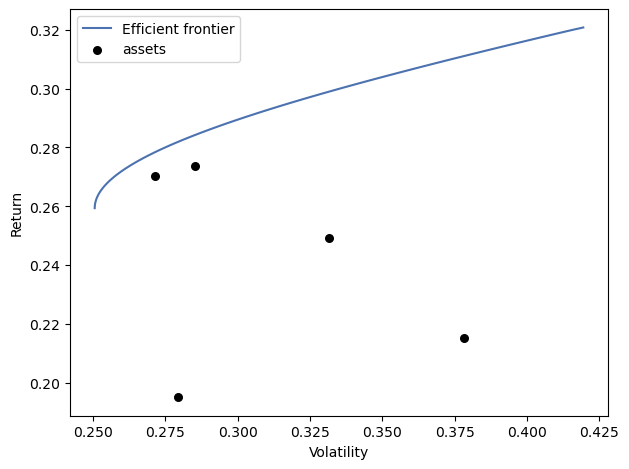

In [8]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

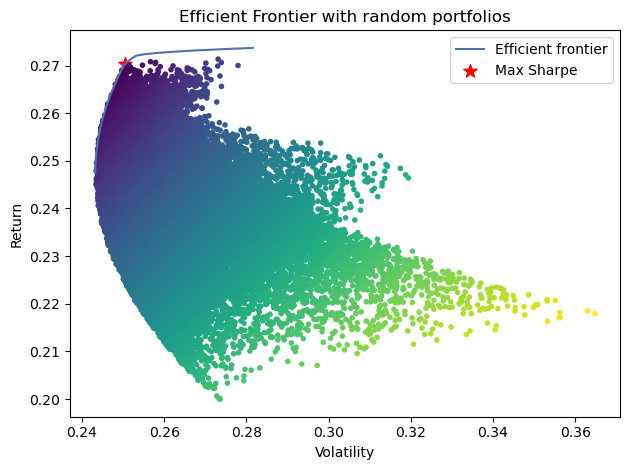

In [9]:
import copy 
ef = EfficientFrontier(mu, S)
# ef.add_objective(objective_functions.L2_reg, gamma=0.1)
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 25000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [10]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


# Calculate expected returns and covariance matrix
mu = mean_historical_return(portfolio_data)
S = CovarianceShrinkage(portfolio_data).ledoit_wolf()

# Create an EfficientFrontier instance
ef = EfficientFrontier(mu, S)

# Specify the target expected return
target_return = 30  # Replace with your desired target return

# Optimize for minimum risk for the given target return
weights_2 = ef.efficient_risk(target_return)

# Display the optimized portfolio weights
print(weights_2)

OrderedDict([(('Adj Close', 'AAPL'), 0.9999999953901966), (('Adj Close', 'AMZN'), 6.153385e-10), (('Adj Close', 'GOOG'), 2.16325e-10), (('Adj Close', 'META'), 1.913005e-10), (('Adj Close', 'MSFT'), 3.5867323e-09)])


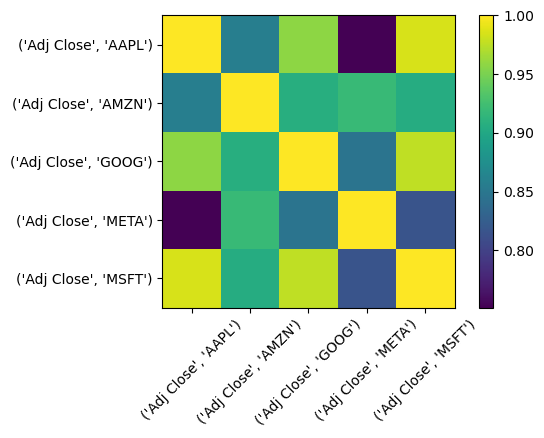

In [11]:
from pypfopt.plotting import plot_covariance
# Calculate covariance matrix S using df
S = portfolio_data.cov()

# Define tickers (labels) for the assets
tickers = portfolio_data.columns

# Plot the covariance matrix heatmap
plot_covariance(S, plot_correlation=True, show_tickers=True)

# Set custom tick labels
plt.xticks(np.arange(len(tickers)), tickers, rotation=45)
plt.yticks(np.arange(len(tickers)), tickers)

# Show the plot
plt.show()

In [12]:
# Log of percentage change
cov_matrix = portfolio_data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Adj Close                                        
                    AAPL      AMZN      GOOG      META      MSFT
Adj Close AAPL  0.000323  0.000200  0.000187  0.000223  0.000202
          AMZN  0.000200  0.000434  0.000235  0.000287  0.000220
          GOOG  0.000187  0.000235  0.000307  0.000266  0.000212
          META  0.000223  0.000287  0.000266  0.000580  0.000226
          MSFT  0.000202  0.000220  0.000212  0.000226  0.000292

In [13]:
corr_matrix = portfolio_data.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix


Adj Close                                        
                    AAPL      AMZN      GOOG      META      MSFT
Adj Close AAPL  1.000000  0.534777  0.594679  0.514981  0.658729
          AMZN  0.534777  1.000000  0.642176  0.571163  0.617152
          GOOG  0.594679  0.642176  1.000000  0.629572  0.706262
          META  0.514981  0.571163  0.629572  1.000000  0.548398
          MSFT  0.658729  0.617152  0.706262  0.548398  1.000000

In [16]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.2, 'AMZN': 0.1, 'GOOG': 0.2, 'META': 0.2, 'MSFT': 0.3}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
print(f"{port_var:.5f}")

0.00000


In [17]:
# Yearly returns for individual companies
ind_er = portfolio_data.resample('Y').last().pct_change().mean()
ind_er

Adj Close  AAPL    0.307540
           AMZN    0.301580
           GOOG    0.205858
           META    0.298445
           MSFT    0.284271
dtype: float64

In [19]:
# Portfolio returns
w = [0.2, 0.1, 0.2, 0.2, 0.3]
port_er = (w*ind_er).sum()
port_er

0.27780798168575416

In [20]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = portfolio_data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Adj Close  AAPL    0.284184
           AMZN    0.329464
           GOOG    0.277233
           META    0.380659
           MSFT    0.270201
dtype: float64

In [21]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

Returns  Volatility
Adj Close AAPL  0.307540    0.284184
          AMZN  0.301580    0.329464
          GOOG  0.205858    0.277233
          META  0.298445    0.380659
          MSFT  0.284271    0.270201

In [22]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(portfolio_data.columns)
num_portfolios = 25000

In [23]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [24]:
# Create an empty dictionary to store the data
data = {'Returns': p_ret, 'Volatility': p_vol}

# Iterate over the assets in your portfolio
for counter, symbol in enumerate(portfolio_data.columns.tolist()):
    # Create a key for each asset in the format: "<symbol> Weight"
    weight_key = f'{symbol} Weight'
    
    # Extract the weights for the current asset from p_weights
    weights_for_asset = [w[counter] for w in p_weights]
    
    # Add the weights data to the dictionary
    data[weight_key] = weights_for_asset

In [25]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,"('Adj Close', 'AAPL') Weight","('Adj Close', 'AMZN') Weight","('Adj Close', 'GOOG') Weight","('Adj Close', 'META') Weight","('Adj Close', 'MSFT') Weight"
0,0.295650,0.260162,0.139939,0.335930,0.001933,0.173544,0.348654
1,0.290526,0.262312,0.126523,0.209317,0.055022,0.282359,0.326778
2,0.291991,0.253341,0.266809,0.269950,0.067558,0.150758,0.244925
3,0.295458,0.279648,0.325018,0.107932,0.058547,0.447787,0.060716
4,0.279269,0.265900,0.151914,0.183377,0.207139,0.319680,0.137891


<Axes: xlabel='Volatility', ylabel='Returns'>

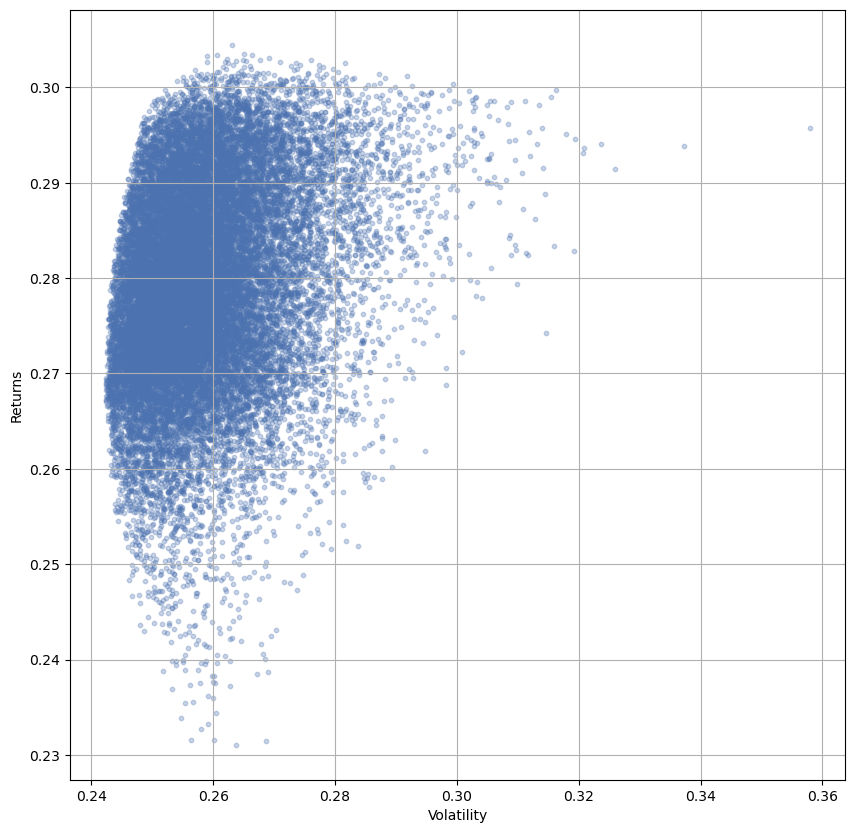

In [26]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [27]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                         0.268931
Volatility                      0.242312
('Adj Close', 'AAPL') Weight    0.317329
('Adj Close', 'AMZN') Weight    0.063356
('Adj Close', 'GOOG') Weight    0.304450
('Adj Close', 'META') Weight    0.003687
('Adj Close', 'MSFT') Weight    0.311177
Name: 18707, dtype: float64

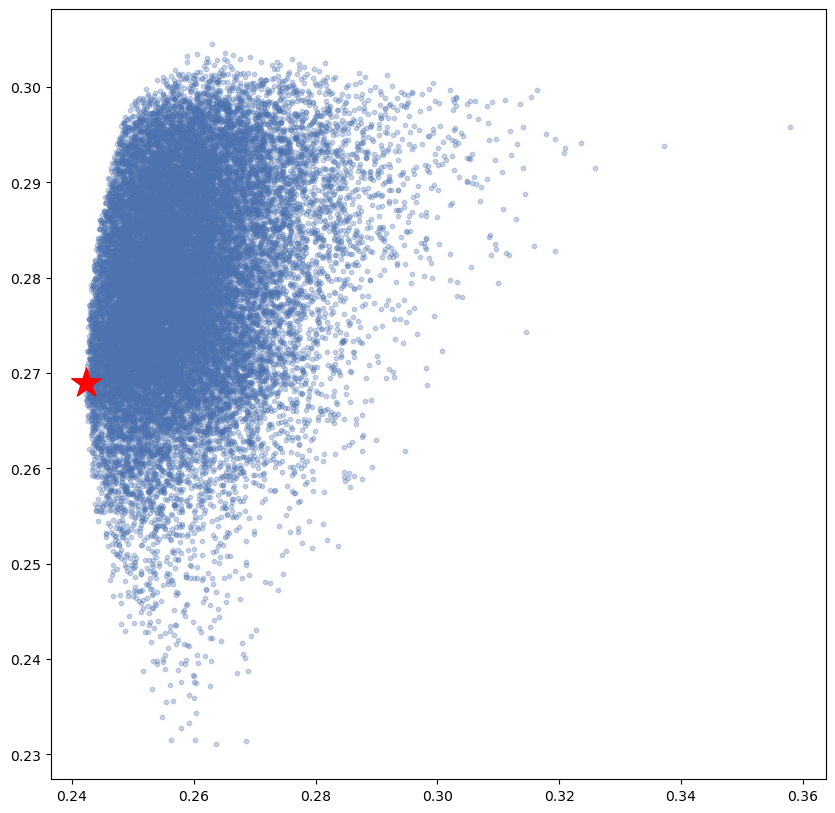

In [28]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [31]:
# Finding the optimal portfolio
rf = 0.04286 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                         0.296893
Volatility                      0.248655
('Adj Close', 'AAPL') Weight    0.402589
('Adj Close', 'AMZN') Weight    0.197396
('Adj Close', 'GOOG') Weight    0.007511
('Adj Close', 'META') Weight    0.030099
('Adj Close', 'MSFT') Weight    0.362404
Name: 24880, dtype: float64